## Nama : Adriati Manuk Allo
## NIM  : 2209106018
## Kelas: A1 22
## Posttest 5

## Import Library

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M

## Membaca file csv

In [269]:
car = pd.read_csv('ford_new.csv')

In [270]:
car

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,217,12000,Automatic,15944.0,Petrol,150.0,57.7,1.0
1,Focus,2018,14000,Manual,9083.0,Petrol,150.0,57.7,1.0
2,Focus,2017,13000,Manual,12456.0,Petrol,150.0,57.7,1.0
3,Fiesta,2019,17500,Manual,10460.0,Petrol,145.0,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482.0,Petrol,145.0,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17809,B-MAX,2017,8999,Manual,16700.0,Petrol,150.0,47.1,1.4
17810,B-MAX,2014,7499,Manual,40700.0,Petrol,30.0,57.7,1.0
17811,Focus,2015,9999,Manual,7010.0,Diesel,20.0,67.3,1.6
17812,KA,2018,8299,Manual,5007.0,Petrol,145.0,57.7,1.2


## Data Cleaning

In [271]:
car.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## Menampilkan informasi dataset

In [272]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17814 entries, 0 to 17813
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17814 non-null  object 
 1   year          17814 non-null  int64  
 2   price         17814 non-null  int64  
 3   transmission  17814 non-null  object 
 4   mileage       17814 non-null  float64
 5   fuelType      17814 non-null  object 
 6   tax           17814 non-null  float64
 7   mpg           17814 non-null  float64
 8   engineSize    17814 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.2+ MB


# Preprocessing

## Encoding 

In [273]:
eo = OrdinalEncoder()
car['fuelType'] = eo.fit_transform(car[['fuelType']])
car['model'] = eo.fit_transform(car[['model']])
car['transmission'] = eo.fit_transform(car[['transmission']])
car

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5.0,217,12000,0.0,15944.0,4.0,150.0,57.7,1.0
1,6.0,2018,14000,1.0,9083.0,4.0,150.0,57.7,1.0
2,6.0,2017,13000,1.0,12456.0,4.0,150.0,57.7,1.0
3,5.0,2019,17500,1.0,10460.0,4.0,145.0,40.3,1.5
4,5.0,2019,16500,0.0,1482.0,4.0,145.0,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17809,0.0,2017,8999,1.0,16700.0,4.0,150.0,47.1,1.4
17810,0.0,2014,7499,1.0,40700.0,4.0,30.0,57.7,1.0
17811,6.0,2015,9999,1.0,7010.0,0.0,20.0,67.3,1.6
17812,11.0,2018,8299,1.0,5007.0,4.0,145.0,57.7,1.2


In [274]:
car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5.0,217,12000,0.0,15944.0,4.0,150.0,57.7,1.0
1,6.0,2018,14000,1.0,9083.0,4.0,150.0,57.7,1.0
2,6.0,2017,13000,1.0,12456.0,4.0,150.0,57.7,1.0
3,5.0,2019,17500,1.0,10460.0,4.0,145.0,40.3,1.5
4,5.0,2019,16500,0.0,1482.0,4.0,145.0,48.7,1.0


In [275]:
X = car[['mileage','engineSize']]
y = car['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [276]:
y_train

5684      7250
7583      9499
16280     8990
9066      7995
6444      9000
         ...  
5077     10000
11288    15495
16489     7799
10075     9199
8602     18500
Name: price, Length: 14251, dtype: int64

# Supervised Learning

## Linear Regression

In [277]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [278]:
lr.fit(X_train, y_train)

LinearRegression()

In [279]:
y_pred = lr.predict(X_test)

In [280]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

## Hasil Prediksi

In [281]:
import numpy as np

print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 2353.2313906850486
MSE : 9355833.757165726
RMSE : 3058.73074283529
R-Squared : 0.5886665694325987


## Mengecek korelasi antar attribute

In [282]:
car.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,0.007999,0.316131,-0.064690,0.076719,-0.387137,0.184706,-0.224491,0.499239
year,0.007999,1.000000,0.096057,0.017127,-0.103772,0.008166,0.040139,-0.003122,-0.014715
price,0.316131,0.096057,1.000000,-0.058604,-0.530481,-0.201897,0.404932,-0.346285,0.411255
transmission,-0.064690,0.017127,-0.058604,1.000000,0.016987,-0.005317,-0.053504,0.056292,-0.026535
mileage,0.076719,-0.103772,-0.530481,0.016987,1.000000,-0.257182,-0.256504,0.117727,0.214621
fuelType,-0.387137,0.008166,-0.201897,-0.005317,-0.257182,1.000000,0.129425,-0.297001,-0.642861
tax,0.184706,0.040139,0.404932,-0.053504,-0.256504,0.129425,1.000000,-0.501360,0.184632
mpg,-0.224491,-0.003122,-0.346285,0.056292,0.117727,-0.297001,-0.501360,1.000000,-0.262024
engineSize,0.499239,-0.014715,0.411255,-0.026535,0.214621,-0.642861,0.184632,-0.262024,1.000000


## Visualisasi Data

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


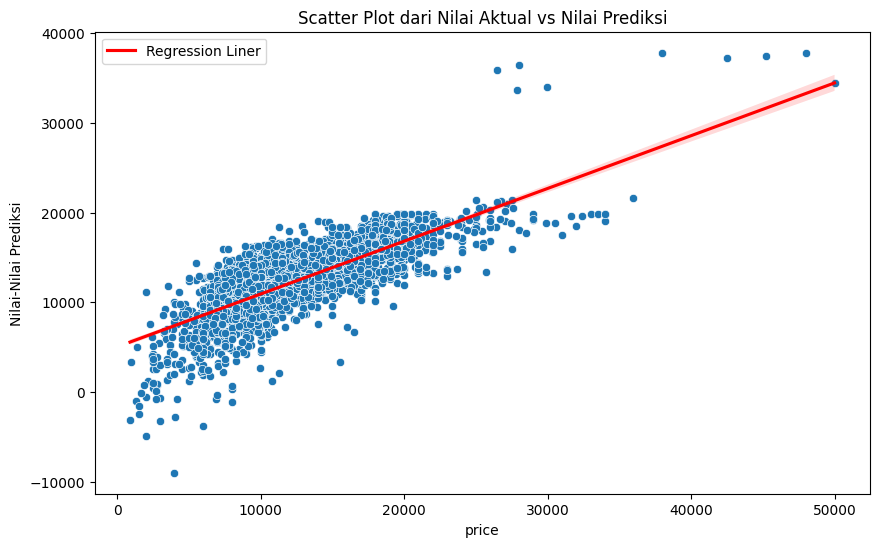

In [283]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Scatter Plot dari Nilai Aktual vs Nilai Prediksi")
plt.xlabel("Nilai-Nilai Aktual")
plt.ylabel("Nilai-Nilai Prediksi")

sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', label='Regression Liner')
plt.legend()
plt.show()

Berdasarkan plot diatas dapat diambil kesimpulan bahwa korelasi antara sumbu X (mileage dan engineSize) dan sumbu y (price) memiliki korelasi positif karena titik-titik pada scatter plot berada cukup dekat dengan garis regresi (garis yang berwarna merah)

# Unsupervised Learning

## K-Means

In [284]:
X_means = car
X = X_means[['mileage','engineSize']]

In [285]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [286]:
data1 = X.copy()
data1['label_cluster'] = kmeans.labels_

In [287]:
data1

,mileage,engineSize,label_cluster
0,15944.0,1.0,1
1,9083.0,1.0,1
2,12456.0,1.0,1
3,10460.0,1.5,1
4,1482.0,1.0,1
...,...,...,...
17809,16700.0,1.4,1
17810,40700.0,1.0,0
17811,7010.0,1.6,1
17812,5007.0,1.2,1


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


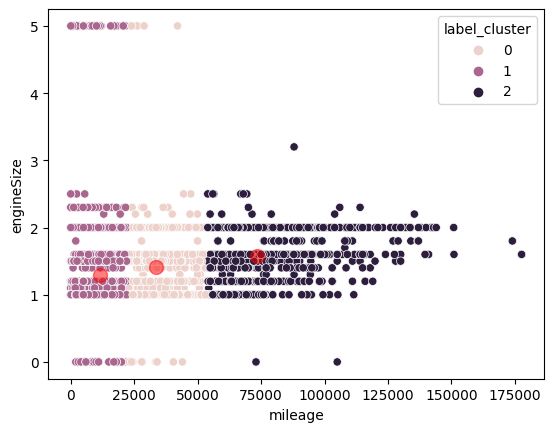

In [288]:
centroids = kmeans.cluster_centers_
sns.scatterplot(data=data1, x='mileage', y='engineSize', hue='label_cluster')
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100, label='Centroids')

## Cluster yang telah diprediksi

### Unlabeled Dataset

In [292]:
# silhouette score
ss_score = silhouette_score(X,data1['label_cluster'])
print(f"Silhouette Score: {ss_score:.2f}")

# davies bouldin score
db_index = davies_bouldin_score(X,data1['label_cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# calinski harabasz score
ch_index = calinski_harabasz_score(X,data1['label_cluster'])
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.59
Davies-Bouldin Index: 0.53
Calinski-Harabasz Index: 39075.78


### Labeled Dataset

In [293]:
cross_tab = pd.crosstab(data1["label_cluster"], car["price"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(car["price"], data1['label_cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(car['price'], data1['label_cluster'])
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# Fungsi HCV-M
homogeneity = homogeneity_score(car["price"], data1['label_cluster'])
completeness = completeness_score(car["price"], data1['label_cluster'])
v_measure = v_measure_score(car["price"], data1['label_cluster'])
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
price          495    675    694    795    850    895    950    999    1095   \
label_cluster                                                                  
0                  0      0      0      0      0      0      0      0      0   
1                  0      0      0      0      0      0      0      0      0   
2                  1      3      1      2      1      1      1      1      1   

price          1200   ...  41000  42000  42489  42500  42999  45250  48000  \
label_cluster         ...                                                    
0                  0  ...      0      0      0      0      0      0      0   
1                  0  ...      2      1      1      1      1      1      1   
2                  1  ...      0      0      0      0      0      0      0   

price          48999  49999  54995  
label_cluster                       
0                  0      0      0  
1                  1      1      1  
2                  0      0      0  

[3 r

## Visualisasi Data

In [296]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=car, x="mileage", y="engineSize", hue=car["price"], palette='Set2', marker="D", s=130, label="True Labels")
sns.scatterplot(data=car, x="mileage", y="engineSize", hue=data1["label_cluster"], palette='Set2', marker="o", s=40, label="Clusters")
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100, label='Centroids')
plt.title(f"K-Means Clustering (K=3)")
plt.xlabel("Mileage")
plt.ylabel("Engine Size")
plt.legend(title="Legend", loc="upper right")
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

ValueError: Image size of 755x73735 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 900x600 with 1 Axes>